## ✅ **TASK A1 — Importing Libraries & Loading Data**


1. Import required libraries




In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

2. Load a dataset using pandas


In [27]:
df = pd.read_csv('House_Prices.csv')

3. Display dataset head & description


In [28]:
# Show first five rows using .head()
print("First 5 rows of the dataset:")
print(df.head())
print("\n" + "="*60 + "\n")

# Display .info()
print("Dataset Information:")
df.info()
print("\n" + "="*60 + "\n")

# Display .describe()
print("Statistical Description:")
print(df.describe())
print("\n" + "="*60 + "\n")

First 5 rows of the dataset:
   Area (sqft)  Bedrooms  Age (years)  Price (Lakhs)
0         1000         2           10             65
1          800         1           15             48
2         1200         3            8             85
3         1500         4            5            120
4          900         2           12             60


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Area (sqft)    20 non-null     int64
 1   Bedrooms       20 non-null     int64
 2   Age (years)    20 non-null     int64
 3   Price (Lakhs)  20 non-null     int64
dtypes: int64(4)
memory usage: 772.0 bytes


Statistical Description:
       Area (sqft)   Bedrooms  Age (years)  Price (Lakhs)
count    20.000000  20.000000    20.000000      20.000000
mean   1327.500000   2.750000     9.900000      94.450000
std     417.850074   0.966546   

4. Check column names


In [29]:
print("Available columns:")
print(df.columns.tolist())
print("\n")

Available columns:
['Area (sqft)', 'Bedrooms', 'Age (years)', 'Price (Lakhs)']




In [37]:
# Identify features (X) and target (y)
print("\n4. Features and Target:")
print("Features (X): Area, Bedrooms, Age")
print("Target (y): Price")

X = df[['Area (sqft)', 'Bedrooms', 'Age (years)']]
y = df['Price (Lakhs)']

print("\nX shape:", X.shape)
print("y shape:", y.shape)


4. Features and Target:
Features (X): Area, Bedrooms, Age
Target (y): Price

X shape: (20, 3)
y shape: (20,)


## ✅ **TASK D2 — Multiple Linear Regression Model Training**


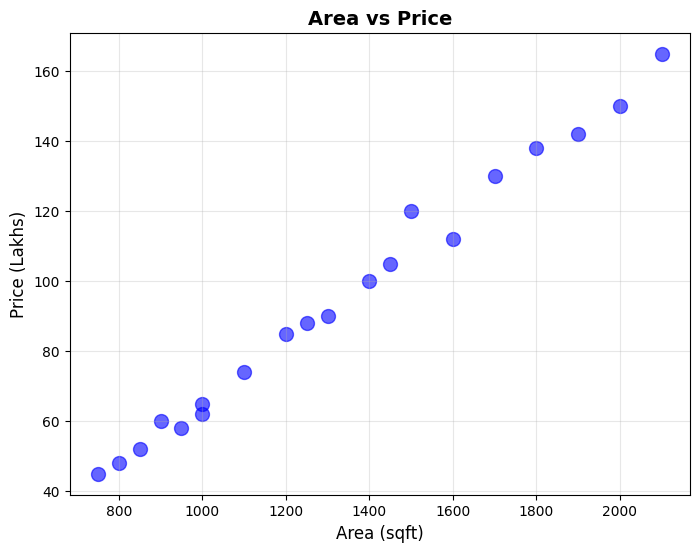

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Area (sqft)'], df['Price (Lakhs)'], color='blue', alpha=0.6, s=100)
plt.xlabel('Area (sqft)', fontsize=12)
plt.ylabel('Price (Lakhs)', fontsize=12)
plt.title('Area vs Price', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

#✅ **TASK D2 — Multiple Linear Regression Model Training**


In [38]:
# Create and train the model
model = LinearRegression()
model.fit(X, y)

print("\nModel trained successfully!")

# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("\n1. Model Coefficients:")
print(f"   Area coefficient (w1): {coefficients[0]:.4f}")
print(f"   Bedrooms coefficient (w2): {coefficients[1]:.4f}")
print(f"   Age coefficient (w3): {coefficients[2]:.4f}")

print(f"\n2. Intercept (b): {intercept:.4f}")

print("\n3. Model Equation:")
print(f"   Price = {coefficients[0]:.4f} × Area + {coefficients[1]:.4f} × Bedrooms + {coefficients[2]:.4f} × Age + {intercept:.4f}")


Model trained successfully!

1. Model Coefficients:
   Area coefficient (w1): 0.0780
   Bedrooms coefficient (w2): 2.3727
   Age coefficient (w3): -0.5237

2. Intercept (b): -10.4708

3. Model Equation:
   Price = 0.0780 × Area + 2.3727 × Bedrooms + -0.5237 × Age + -10.4708


#✅ **TASK D3 — Model Evaluation**


1. Mean Squared Error (MSE): 7.8547
2. R² Score: 0.9940

3. Model Performance Interpretation:
   - The R² score of 0.9940 means the model explains 99.40% of the variance in house prices.
   - This indicates a STRONG model performance.

4. Creating Evaluation Visualization...
✓ Visualization saved as: task_d3_evaluation.png


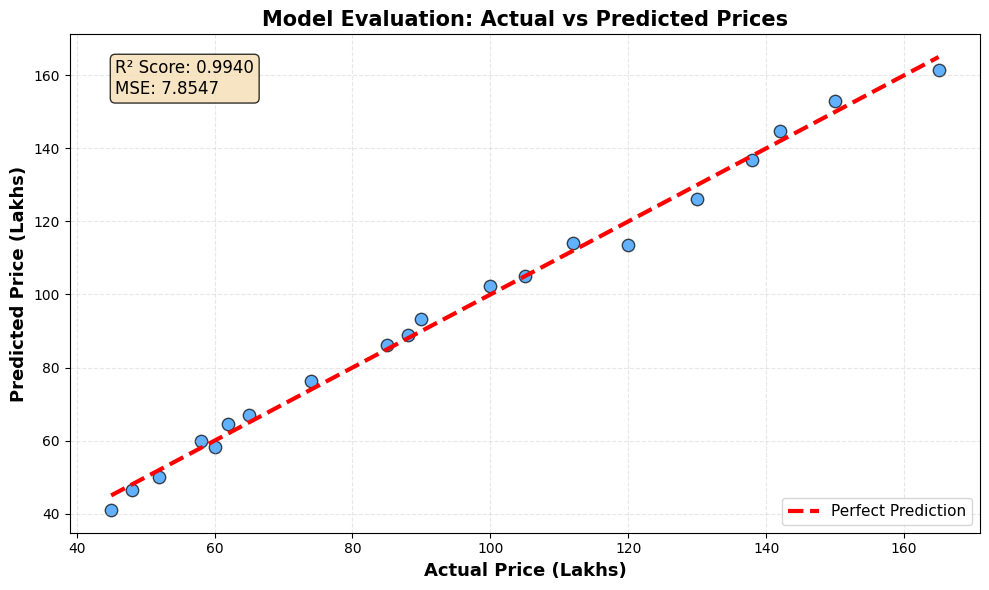

In [42]:
# Make predictions on the entire dataset
y_pred = model.predict(X)

# Calculate MSE
mse = mean_squared_error(y, y_pred)
print(f"\n1. Mean Squared Error (MSE): {mse:.4f}")

# Calculate R² Score
r2 = r2_score(y, y_pred)
print(f"2. R² Score: {r2:.4f}")

print("\n3. Model Performance Interpretation:")
print(f"   - The R² score of {r2:.4f} means the model explains {r2*100:.2f}% of the variance in house prices.")
if r2 > 0.8:
    print("   - This indicates a STRONG model performance.")
elif r2 > 0.6:
    print("   - This indicates a GOOD model performance.")
else:
    print("   - This indicates a MODERATE model performance.")

# Visualization for Task D3: Actual vs Predicted Prices
print("\n4. Creating Evaluation Visualization...")
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.7, color='dodgerblue', edgecolors='black', s=80)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=3, label='Perfect Prediction')
plt.xlabel('Actual Price (Lakhs)', fontsize=13, fontweight='bold')
plt.ylabel('Predicted Price (Lakhs)', fontsize=13, fontweight='bold')
plt.title('Model Evaluation: Actual vs Predicted Prices', fontsize=15, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, linestyle='--')

# Add R² and MSE text on plot
textstr = f'R² Score: {r2:.4f}\nMSE: {mse:.4f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig('task_d3_evaluation.png', dpi=300, bbox_inches='tight')
print("✓ Visualization saved as: task_d3_evaluation.png")
plt.show()

#✅ TASK D4 — Predicting New Values

In [39]:
new_house = pd.DataFrame({
    'Area (sqft)': [1600],
    'Bedrooms': [3],
    'Age (years)': [5]
})

print("\nNew House Details:")
print(f"   Area: 1600 sqft")
print(f"   Bedrooms: 3")
print(f"   Age: 5 years")

# Predict price
predicted_price = model.predict(new_house)

print(f"\nPredicted Price: {predicted_price[0]:.2f} Lakhs")

print("\nExplanation:")
print(f"Based on the trained model, a house with 1600 sqft area, 3 bedrooms, and 5 years age is predicted to cost approximately {predicted_price[0]:.2f} Lakhs.")


New House Details:
   Area: 1600 sqft
   Bedrooms: 3
   Age: 5 years

Predicted Price: 118.87 Lakhs

Explanation:
Based on the trained model, a house with 1600 sqft area, 3 bedrooms, and 5 years age is predicted to cost approximately 118.87 Lakhs.


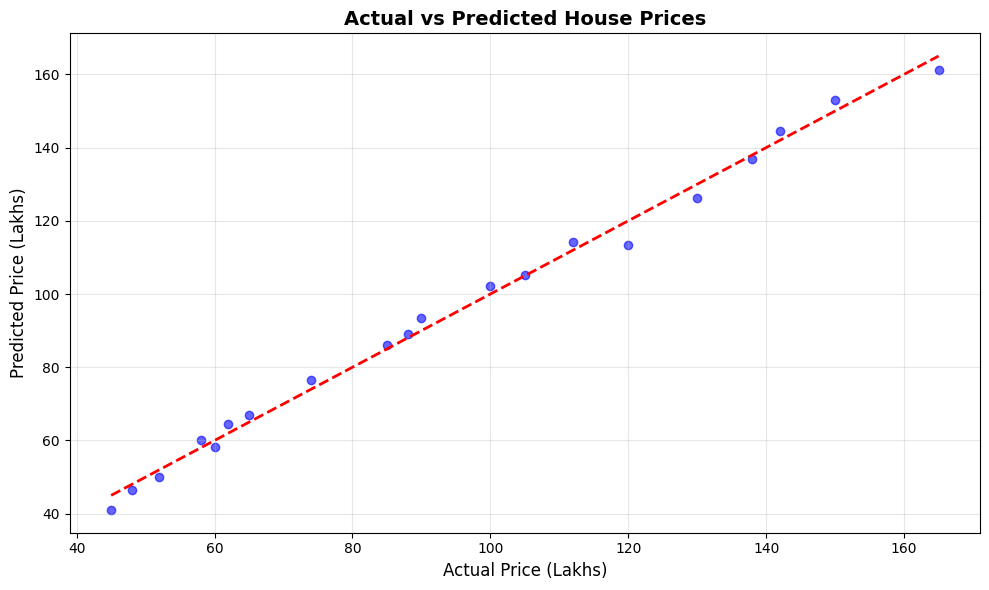

In [47]:
# Visualization : Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Price (Lakhs)', fontsize=12)
plt.ylabel('Predicted Price (Lakhs)', fontsize=12)
plt.title('Actual vs Predicted House Prices', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()